In [2]:
# Import neccessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
# Load dataset
df = pd.read_csv("heart(1).csv")

# Display first 5 and last 5 rows
print(df.head())
print(df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0

In [4]:
# Further examine the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [18]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

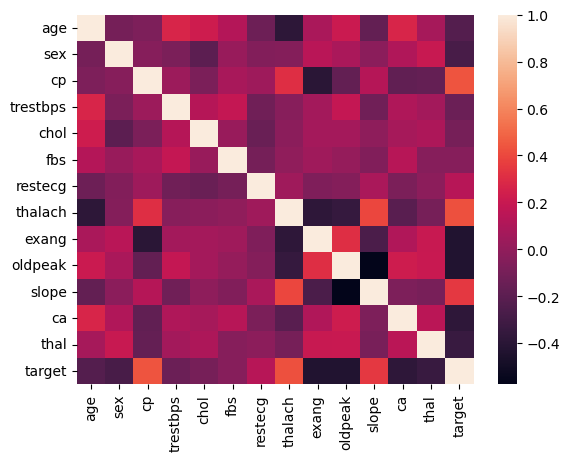

In [17]:
# Correlation matrix heatmap
sns.heatmap(df.corr())

<Axes: xlabel='target', ylabel='count'>

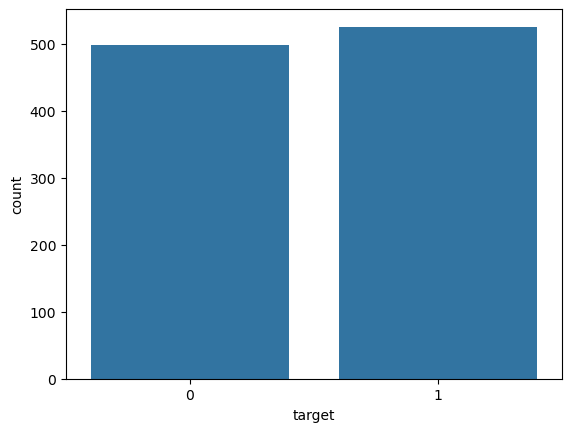

In [19]:
# Countplot for the binary target
sns.countplot(x='target', data=df)

In [6]:
# Sepertate (X) and (y)
X = df.drop("target", axis=1)     # all other columns
y = df["target"]                  # the target column

In [7]:
# Split the data for training and testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split\
(X, y, test_size=0.2, random_state=42)

In [8]:
# Create the model
model = LogisticRegression(max_iter=1000)

In [9]:
# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Test the model
y_pred = model.predict(X_test)

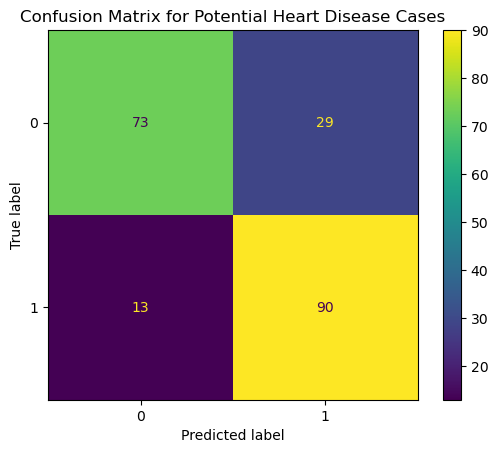

In [11]:
# Import necessary library and built in functions
import matplotlib.pyplot as plt
from sklearn import metrics

# Plot confusion matrix to see where model makes mistakes
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Necessary for Specificity score
tn, fp, fn, tp = confusion_matrix.ravel()

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay\
            (confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.title("Confusion Matrix for Potential Heart Disease Cases")
plt.show()


In [12]:
# Evaluate model's Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percent =round(accuracy * 100,2)

# Evaluate model's Precision 
precision = metrics.precision_score(y_test, y_pred)
precision_percent = round(precision * 100,2)

# Evaluate models's Sensitivity (Recall)
sensitivity_recall = metrics.recall_score(y_test, y_pred)
s_r_percent = round(sensitivity_recall * 100,2)

# Evaluate model's Specificity
specificity = tn / (tn + fp)
specificity_percent = round(specificity * 100,2)

# Evaluate model's F1-score
f1_score = metrics.f1_score(y_test, y_pred)
f1_score_percent = round(f1_score * 100,2)

# Print metrics
print("Model's Evaluation Metrics:")
print("Accuracy:",accuracy_percent,"%")
print("Precision:",precision_percent,"%")
print("Sensitivity(Recall):",s_r_percent,"%")
print("Specificity:",specificity_percent,"%")
print("F1 Score:",f1_score_percent,"%")

Model's Evaluation Metrics:
Accuracy: 79.51 %
Precision: 75.63 %
Sensitivity(Recall): 87.38 %
Specificity: 71.57 %
F1 Score: 81.08 %
